In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!pip install pandas pyarrow

In [7]:
df=pd.read_parquet(r'C:\Users\SRINJOY\Downloads\data.parquet',engine='pyarrow')

In [8]:
df

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


In [9]:
df.dtypes

banknifty    float64
nifty        float64
tte            int32
dtype: object

In [10]:
df_1=pd.read_excel(r'C:\Users\SRINJOY\Downloads\data.xlsx')  ##converted the data to excel file and read it

In [12]:
df_1

,time,banknifty,nifty,tte
0,2021-01-01 09:15:00,0.286058,0.199729,27
1,2021-01-01 09:16:00,0.285381,0.200433,27
2,2021-01-01 09:17:00,0.284233,0.200004,27
3,2021-01-01 09:18:00,0.286104,0.199860,27
4,2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28
690508,2022-06-30 15:27:00,0.240875,0.216558,28
690509,2022-06-30 15:28:00,0.242115,0.216794,28
690510,2022-06-30 15:29:00,0.243426,0.216455,28


In [14]:
df_1.dtypes

time         datetime64[ns]
banknifty           float64
nifty               float64
tte                   int64
dtype: object

In [21]:
##removing saturdays and sundays from data as market closed
df_1=df_1[~df_1['time'].dt.dayofweek.isin([5,6])]   ##5 for saturday and 6 for sunday

In [22]:
df_1

,time,banknifty,nifty,tte
0,2021-01-01 09:15:00,0.286058,0.199729,27
1,2021-01-01 09:16:00,0.285381,0.200433,27
2,2021-01-01 09:17:00,0.284233,0.200004,27
3,2021-01-01 09:18:00,0.286104,0.199860,27
4,2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28
690508,2022-06-30 15:27:00,0.240875,0.216558,28
690509,2022-06-30 15:28:00,0.242115,0.216794,28
690510,2022-06-30 15:29:00,0.243426,0.216455,28


In [23]:
#splitting the timestamp column to date and time column
df_1['Date'] = df_1['time'].dt.date
df_1['Time'] = df_1['time'].dt.time

C:\Users\SRINJOY\AppData\Local\Temp\ipykernel_24784\3024372801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Date'] = df_1['time'].dt.date
C:\Users\SRINJOY\AppData\Local\Temp\ipykernel_24784\3024372801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time'] = df_1['time'].dt.time


In [24]:
df_1

,time,banknifty,nifty,tte,Date,Time
0,2021-01-01 09:15:00,0.286058,0.199729,27,2021-01-01,09:15:00
1,2021-01-01 09:16:00,0.285381,0.200433,27,2021-01-01,09:16:00
2,2021-01-01 09:17:00,0.284233,0.200004,27,2021-01-01,09:17:00
3,2021-01-01 09:18:00,0.286104,0.199860,27,2021-01-01,09:18:00
4,2021-01-01 09:19:00,0.285539,0.198951,27,2021-01-01,09:19:00
...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00


In [26]:
## df_1.to_excel('output_1.xlsx',index=False)

In [32]:
##NSE holiday list taken from 5paisa website for 2021-mid2022
holiday_df=pd.read_excel(r"C:\Users\SRINJOY\Downloads\NSE_Holidays_2021_mid2022.xlsx")

In [33]:
holiday_dates=holiday_df['Holidays'].dt.date

In [34]:
#omit the holiday dates from the dataframe
df_1=df_1[~df_1['Date'].isin(holiday_dates)]

In [35]:
df_1

,time,banknifty,nifty,tte,Date,Time
0,2021-01-01 09:15:00,0.286058,0.199729,27,2021-01-01,09:15:00
1,2021-01-01 09:16:00,0.285381,0.200433,27,2021-01-01,09:16:00
2,2021-01-01 09:17:00,0.284233,0.200004,27,2021-01-01,09:17:00
3,2021-01-01 09:18:00,0.286104,0.199860,27,2021-01-01,09:18:00
4,2021-01-01 09:19:00,0.285539,0.198951,27,2021-01-01,09:19:00
...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00


In [36]:
#trading occurs between 9:15 am to 15:30 pm IST
df_1=df_1[(df_1['time'].dt.hour>9)|((df_1['time'].dt.hour==9)&(df_1['time'].dt.minute>=15))]
df_1=df_1[(df_1['time'].dt.hour<15)|((df_1['time'].dt.hour==15)&(df_1['time'].dt.minute<=30))]

In [37]:
df_1

,time,banknifty,nifty,tte,Date,Time
0,2021-01-01 09:15:00,0.286058,0.199729,27,2021-01-01,09:15:00
1,2021-01-01 09:16:00,0.285381,0.200433,27,2021-01-01,09:16:00
2,2021-01-01 09:17:00,0.284233,0.200004,27,2021-01-01,09:17:00
3,2021-01-01 09:18:00,0.286104,0.199860,27,2021-01-01,09:18:00
4,2021-01-01 09:19:00,0.285539,0.198951,27,2021-01-01,09:19:00
...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28,2022-06-30,15:26:00
690508,2022-06-30 15:27:00,0.240875,0.216558,28,2022-06-30,15:27:00
690509,2022-06-30 15:28:00,0.242115,0.216794,28,2022-06-30,15:28:00
690510,2022-06-30 15:29:00,0.243426,0.216455,28,2022-06-30,15:29:00


In [38]:
time_nan_count=df_1['time'].isna().sum()
time_nan_count

0

In [39]:
banknifty_nan_count=df_1['banknifty'].isna().sum()
banknifty_nan_count

253

In [40]:
nifty_nan_count=df_1['nifty'].isna().sum()
nifty_nan_count

336

In [41]:
tte_nan_count=df_1['tte'].isna().sum()
tte_nan_count

0

In [43]:
### missing value imputation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe with columns 'banknifty' and 'nifty'

# Splitting the data into two sets: one with missing values and one without
missing_banknifty = df_1[df_1['banknifty'].isnull()]
missing_nifty = df_1[df_1['nifty'].isnull()]
data_without_missing = df.dropna()

In [44]:
# Splitting the data without missing values into features and target
X = data_without_missing[['nifty']]
y = data_without_missing['banknifty']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Linear Regression model
model_banknifty = LinearRegression()
model_banknifty.fit(X_train, y_train)

# Predicting missing values for 'banknifty'
missing_banknifty_values = missing_banknifty[['nifty']]
missing_banknifty['banknifty'] = model_banknifty.predict(missing_banknifty_values)

# Updating original dataframe with imputed 'banknifty' values
df_1.update(missing_banknifty)

C:\Users\SRINJOY\AppData\Local\Temp\ipykernel_24784\3768692524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_banknifty['banknifty'] = model_banknifty.predict(missing_banknifty_values)


In [45]:
# Splitting the data without missing values into features and target
X = data_without_missing[['banknifty']]
y = data_without_missing['nifty']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Linear Regression model
model_nifty = LinearRegression()
model_nifty.fit(X_train, y_train)

# Predicting missing values for 'nifty'
missing_nifty_values = missing_nifty[['banknifty']]
missing_nifty['nifty'] = model_nifty.predict(missing_nifty_values)

# Updating original dataframe with imputed 'nifty' values
df_1.update(missing_nifty)


C:\Users\SRINJOY\AppData\Local\Temp\ipykernel_24784\3681648311.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_nifty['nifty'] = model_nifty.predict(missing_nifty_values)


In [46]:
df_1

,time,banknifty,nifty,tte,Date,Time
0,2021-01-01 09:15:00,0.286058,0.199729,27.0,2021-01-01,09:15:00
1,2021-01-01 09:16:00,0.285381,0.200433,27.0,2021-01-01,09:16:00
2,2021-01-01 09:17:00,0.284233,0.200004,27.0,2021-01-01,09:17:00
3,2021-01-01 09:18:00,0.286104,0.199860,27.0,2021-01-01,09:18:00
4,2021-01-01 09:19:00,0.285539,0.198951,27.0,2021-01-01,09:19:00
...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28.0,2022-06-30,15:26:00
690508,2022-06-30 15:27:00,0.240875,0.216558,28.0,2022-06-30,15:27:00
690509,2022-06-30 15:28:00,0.242115,0.216794,28.0,2022-06-30,15:28:00
690510,2022-06-30 15:29:00,0.243426,0.216455,28.0,2022-06-30,15:29:00


In [48]:
#checking if there are any missing values
df_1.isnull().sum()

time         0
banknifty    0
nifty        0
tte          0
Date         0
Time         0
dtype: int64

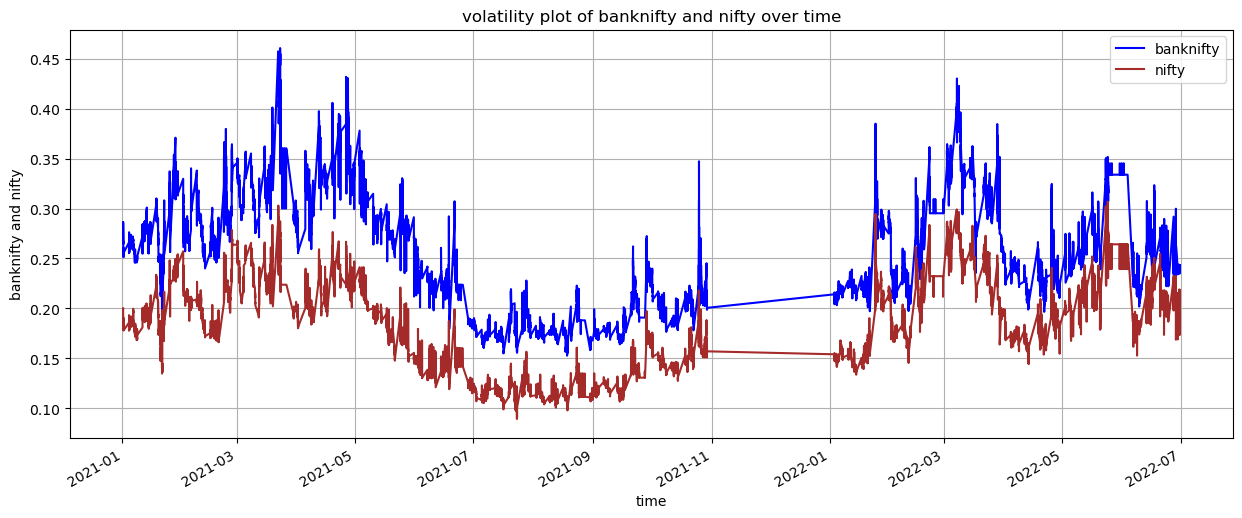

In [62]:
#plot of stocks volatility
df_1.plot(x='time',y=['banknifty','nifty'],figsize=(15,6),color=['blue','brown'],grid=True)
plt.xlabel('time')
plt.ylabel('banknifty and nifty')
plt.title('volatility plot of banknifty and nifty over time')
plt.legend()
plt.show()

In [49]:
#calculating spread
df_1['spread']=df_1['banknifty']-df_1['nifty']
df_1

,time,banknifty,nifty,tte,Date,Time,spread
0,2021-01-01 09:15:00,0.286058,0.199729,27.0,2021-01-01,09:15:00,0.086329
1,2021-01-01 09:16:00,0.285381,0.200433,27.0,2021-01-01,09:16:00,0.084948
2,2021-01-01 09:17:00,0.284233,0.200004,27.0,2021-01-01,09:17:00,0.084229
3,2021-01-01 09:18:00,0.286104,0.199860,27.0,2021-01-01,09:18:00,0.086244
4,2021-01-01 09:19:00,0.285539,0.198951,27.0,2021-01-01,09:19:00,0.086588
...,...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28.0,2022-06-30,15:26:00,0.025943
690508,2022-06-30 15:27:00,0.240875,0.216558,28.0,2022-06-30,15:27:00,0.024317
690509,2022-06-30 15:28:00,0.242115,0.216794,28.0,2022-06-30,15:28:00,0.025321
690510,2022-06-30 15:29:00,0.243426,0.216455,28.0,2022-06-30,15:29:00,0.026971


In [52]:
#mean and std deviation of spread series
spread_mean=df_1['spread'].mean()
spread_sd=df_1['spread'].std()
print(spread_mean)
print(spread_sd)

0.07266753519440129
0.026423192676265816


In [53]:
#calculating z_score
df_1['z_score']=(df_1['spread']-spread_mean)/spread_sd
df_1

,time,banknifty,nifty,tte,Date,Time,spread,z_score
0,2021-01-01 09:15:00,0.286058,0.199729,27.0,2021-01-01,09:15:00,0.086329,0.517026
1,2021-01-01 09:16:00,0.285381,0.200433,27.0,2021-01-01,09:16:00,0.084948,0.464780
2,2021-01-01 09:17:00,0.284233,0.200004,27.0,2021-01-01,09:17:00,0.084229,0.437550
3,2021-01-01 09:18:00,0.286104,0.199860,27.0,2021-01-01,09:18:00,0.086244,0.513790
4,2021-01-01 09:19:00,0.285539,0.198951,27.0,2021-01-01,09:19:00,0.086588,0.526828
...,...,...,...,...,...,...,...,...
690507,2022-06-30 15:26:00,0.240701,0.214758,28.0,2022-06-30,15:26:00,0.025943,-1.768315
690508,2022-06-30 15:27:00,0.240875,0.216558,28.0,2022-06-30,15:27:00,0.024317,-1.829871
690509,2022-06-30 15:28:00,0.242115,0.216794,28.0,2022-06-30,15:28:00,0.025321,-1.791855
690510,2022-06-30 15:29:00,0.243426,0.216455,28.0,2022-06-30,15:29:00,0.026971,-1.729410


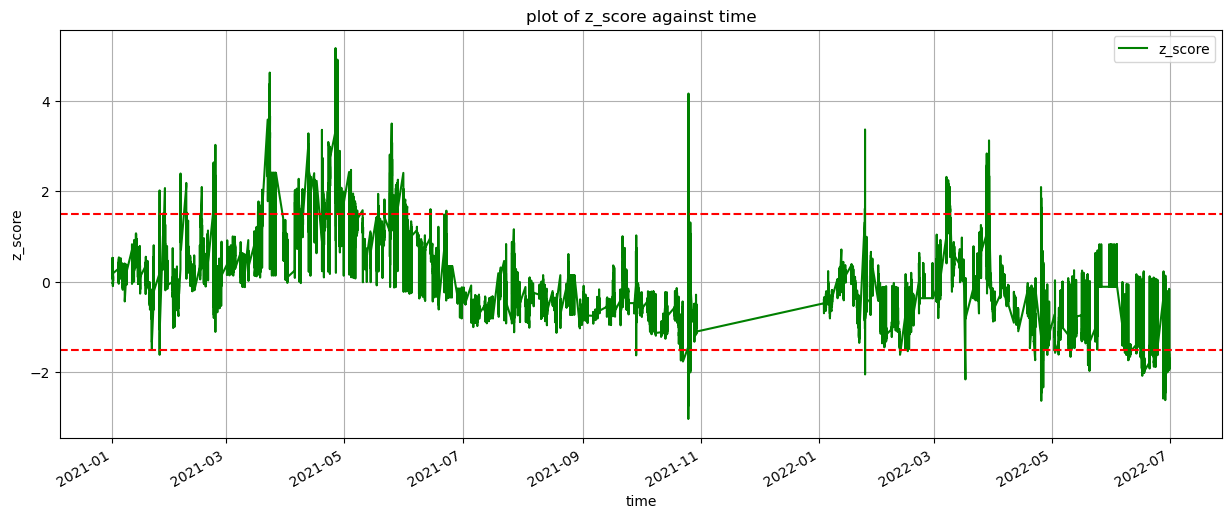

In [67]:
#plot of z-score over time
df_1.plot(x='time',y='z_score',figsize=(15,6),color='green',grid=True)
plt.xlabel('time')
plt.ylabel('z_score')
plt.title('plot of z_score against time')
plt.axhline(y=1.5,color='red',linestyle='--')
plt.axhline(y=-1.5,color='red',linestyle='--')
plt.show()

##red lines indicate threshold values

In [60]:
#### z score based trading model ####
##### threshold=1.5 

# Function to calculate P/L
def calculate_pl(row):
    return row['spread'] * ((row['tte']) ** 0.7)  ##tte means time to expiry

# Function to simulate pair trading

# Assuming z_score follows a normal distribution
    # If z_score > threshold, go short on BankNifty and long on Nifty
    # If z_score < -threshold, go long on BankNifty and short on Nifty
    # If -threshold <= z_score <= threshold, close any open positions

def pair_trading(row):
    pnl = 0
    position = 0  # 1 for long BankNifty, -1 for long Nifty, 0 for no position

    z = row['z_score']
    if z > 1.5 and position != -1:  # Go short on BankNifty and long on Nifty
        pnl += calculate_pl(row)
        position = -1
    elif z < -1.5 and position != 1:  # Go long on BankNifty and short on Nifty
        pnl += calculate_pl(row)
        position = 1
    elif -1.5 <= z <= 1.5:  # Close any open positions
        pnl += 0
        position = 0

    return pnl

# Apply the function to each row in the DataFrame
df_1['P/L'] = df_1.apply(pair_trading, axis=1)

# Now df contains the 'P/L' values calculated using the function for each row
print(df_1)


                      time  banknifty     nifty   tte        Date      Time  \
0      2021-01-01 09:15:00   0.286058  0.199729  27.0  2021-01-01  09:15:00   
1      2021-01-01 09:16:00   0.285381  0.200433  27.0  2021-01-01  09:16:00   
2      2021-01-01 09:17:00   0.284233  0.200004  27.0  2021-01-01  09:17:00   
3      2021-01-01 09:18:00   0.286104  0.199860  27.0  2021-01-01  09:18:00   
4      2021-01-01 09:19:00   0.285539  0.198951  27.0  2021-01-01  09:19:00   
...                    ...        ...       ...   ...         ...       ...   
690507 2022-06-30 15:26:00   0.240701  0.214758  28.0  2022-06-30  15:26:00   
690508 2022-06-30 15:27:00   0.240875  0.216558  28.0  2022-06-30  15:27:00   
690509 2022-06-30 15:28:00   0.242115  0.216794  28.0  2022-06-30  15:28:00   
690510 2022-06-30 15:29:00   0.243426  0.216455  28.0  2022-06-30  15:29:00   
690511 2022-06-30 15:30:00   0.241907  0.216081  28.0  2022-06-30  15:30:00   

          spread   z_score       P/L  
0       0.08

In [69]:
#### generating buy or sell signal based on z_score

# Function to generate buy/sell signals based on z-score
def generate_signal(row):
    if row['z_score'] > 1.5:
        return 'Sell'
    elif row['z_score'] < -1.5:
        return 'Buy'
    else:
        return 'Hold'

# Apply the function to each row in the DataFrame and create a new column
df_1['Signal'] = df_1.apply(generate_signal, axis=1)

# Now df contains the 'Signal' column indicating buy/sell signals based on z-score
print(df_1)


                      time  banknifty     nifty   tte        Date      Time  \
0      2021-01-01 09:15:00   0.286058  0.199729  27.0  2021-01-01  09:15:00   
1      2021-01-01 09:16:00   0.285381  0.200433  27.0  2021-01-01  09:16:00   
2      2021-01-01 09:17:00   0.284233  0.200004  27.0  2021-01-01  09:17:00   
3      2021-01-01 09:18:00   0.286104  0.199860  27.0  2021-01-01  09:18:00   
4      2021-01-01 09:19:00   0.285539  0.198951  27.0  2021-01-01  09:19:00   
...                    ...        ...       ...   ...         ...       ...   
690507 2022-06-30 15:26:00   0.240701  0.214758  28.0  2022-06-30  15:26:00   
690508 2022-06-30 15:27:00   0.240875  0.216558  28.0  2022-06-30  15:27:00   
690509 2022-06-30 15:28:00   0.242115  0.216794  28.0  2022-06-30  15:28:00   
690510 2022-06-30 15:29:00   0.243426  0.216455  28.0  2022-06-30  15:29:00   
690511 2022-06-30 15:30:00   0.241907  0.216081  28.0  2022-06-30  15:30:00   

          spread   z_score       P/L Signal  
0    

In [68]:
##buy and sell signal to optimze P/L

# Function to calculate P/L
def calculate_pl(row):
    return row['spread'] * ((row['tte']) ** 0.7)  ##tte means time to expiry

# Function to simulate pair trading and find optimal buy and sell signals
def find_optimal_trades(df_1):
    pnl = 0
    max_pnl = 0
    buy_signal = None
    sell_signal = None
    position = None

    for index, row in df_1.iterrows():
        if row['z_score'] > 1.5 and position != 'short':
            pnl += calculate_pl(row)
            position = 'short'
        elif row['z_score'] < -1.5 and position != 'long':
            pnl += calculate_pl(row)
            position = 'long'
        else:
            position = 'none'

        if pnl > max_pnl:
            max_pnl = pnl
            buy_signal = index if position == 'long' else None
            sell_signal = index if position == 'short' else None

    return buy_signal, sell_signal, max_pnl

# Find optimal buy and sell signals
buy_signal, sell_signal, max_pnl = find_optimal_trades(df_1)

print("Optimal Buy Signal:", buy_signal)
print("Optimal Sell Signal:", sell_signal)
print("Maximum P/L:", max_pnl)


Optimal Buy Signal: 690510
Optimal Sell Signal: None
Maximum P/L: 5719.72803711717


In [71]:
##### another modelling technique to improve performance of this z score based model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into features (X) and labels (y)
X = df_1[['banknifty', 'nifty']]  # Features
y = df_1['Signal']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9975269601881132


In [75]:
####conclusion
'''
so using z_score based model, we found the buy and sell signals based on given threshold and 
corresponding P/L calculated by the given formula

now we tried to implement a machine learning technique called Random Forest Classifier and implemented 
it in the dataset to improve accuracy over the z-score based trading strategy
'''

'\nso using z_score based model, we found the buy and sell signals based on given threshold and \ncorresponding P/L calculated by the given formula\n\nnow we tried to implement a machine learning technique called Random Forest Classifier and implemented \nit in the dataset to improve accuracy over the z-score based trading strategy\n'

In [ ]:
##findings
'''
by using machine learning technique, we achieved accuracy of 99 percent in this dataset. so it can be 
very useful to predict signals in the future for this pair of stocks and it will give optimized P/L
as well.
'''